In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os                      
import requests, io            
import zipfile as zf            
import shutil       

In [2]:
url = "/Users/jameshu/Downloads/currency_exchange_rate.csv"
currencies = pd.read_csv(url)
currencies

,Unnamed: 0,LOCATION,MEASURE,TIME,Value
0,0,AUS,NATUSD,1950,0.892857
1,1,AUS,NATUSD,1951,0.892857
2,2,AUS,NATUSD,1952,0.892857
3,3,AUS,NATUSD,1953,0.892857
4,4,AUS,NATUSD,1954,0.892857
...,...,...,...,...,...
3632,3632,HKG,NATUSD,2014,7.754083
3633,3633,HKG,NATUSD,2015,7.751750
3634,3634,HKG,NATUSD,2016,7.762250
3635,3635,HKG,NATUSD,2017,7.793250


In [3]:
currencies = currencies.drop(currencies.columns[[0]], axis=1)

In [4]:
print(currencies['LOCATION'].unique())

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'CHN' 'COL' 'EST' 'IND'
 'IDN' 'ISR' 'RUS' 'SVN' 'ZAF' 'DEW' 'EU28' 'LVA' 'LTU' 'SAU' 'EA19' 'ARG'
 'CRI' 'BGR' 'HRV' 'CYP' 'MLT' 'PER' 'ROU' 'MKD' 'MDG' 'MAR' 'ZMB' 'SRB'
 'HKG']


In [5]:
values = list(range(1950,2000))
values2 = list(range(2015,2021))
currencies = currencies[currencies.TIME.isin(values) == False ]
currencies

,LOCATION,MEASURE,TIME,Value
50,AUS,NATUSD,2000,1.724827
51,AUS,NATUSD,2001,1.933443
52,AUS,NATUSD,2002,1.840563
53,AUS,NATUSD,2003,1.541914
54,AUS,NATUSD,2004,1.359752
...,...,...,...,...
3632,HKG,NATUSD,2014,7.754083
3633,HKG,NATUSD,2015,7.751750
3634,HKG,NATUSD,2016,7.762250
3635,HKG,NATUSD,2017,7.793250


In [6]:
top10 = ('USA','EU28','JPN','GBR','AUS','CAN','SWE','CHN','HKG','NZL')
topcurrencies = currencies[currencies.LOCATION.isin(top10) == True]
topcurrencies

,LOCATION,MEASURE,TIME,Value
50,AUS,NATUSD,2000,1.724827
51,AUS,NATUSD,2001,1.933443
52,AUS,NATUSD,2002,1.840563
53,AUS,NATUSD,2003,1.541914
54,AUS,NATUSD,2004,1.359752
...,...,...,...,...
3632,HKG,NATUSD,2014,7.754083
3633,HKG,NATUSD,2015,7.751750
3634,HKG,NATUSD,2016,7.762250
3635,HKG,NATUSD,2017,7.793250


LOCATION
AUS     AxesSubplot(0.125,0.125;0.775x0.755)
CAN     AxesSubplot(0.125,0.125;0.775x0.755)
CHN     AxesSubplot(0.125,0.125;0.775x0.755)
EU28    AxesSubplot(0.125,0.125;0.775x0.755)
GBR     AxesSubplot(0.125,0.125;0.775x0.755)
HKG     AxesSubplot(0.125,0.125;0.775x0.755)
JPN     AxesSubplot(0.125,0.125;0.775x0.755)
NZL     AxesSubplot(0.125,0.125;0.775x0.755)
SWE     AxesSubplot(0.125,0.125;0.775x0.755)
USA     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Value, dtype: object

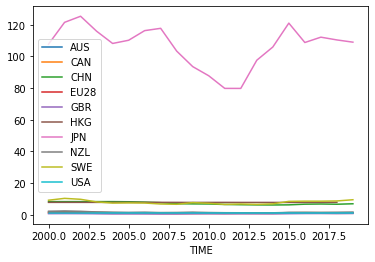

In [7]:
topcurrencies.set_index('TIME', inplace=True)
topcurrencies.groupby('LOCATION')['Value'].plot(legend=True)

In [8]:
topcurloc = topcurrencies['LOCATION']
topcurval = topcurrencies['Value']
newcurr = pd.concat([topcurloc,topcurval], axis=1).reset_index()
newcurr

,TIME,LOCATION,Value
0,2000,AUS,1.724827
1,2001,AUS,1.933443
2,2002,AUS,1.840563
3,2003,AUS,1.541914
4,2004,AUS,1.359752
...,...,...,...
194,2014,HKG,7.754083
195,2015,HKG,7.751750
196,2016,HKG,7.762250
197,2017,HKG,7.793250


In [12]:
AUScur = newcurr['LOCATION'] == 'AUS'
AUSc = newcurr.loc[AUScur,:]
EUcur = newcurr['LOCATION'] == 'EU28'
EUc = newcurr.loc[EUcur,:]
EUc = EUc.reset_index()
JPNcur = newcurr['LOCATION'] == 'JPN'
JPNc= newcurr.loc[JPNcur,:]
JPNc = JPNc.reset_index()
GBRcur= newcurr['LOCATION'] == 'GBR'
GBRc = newcurr.loc[GBRcur,:]
GBRc = GBRc.reset_index()
CHNcur = newcurr['LOCATION'] == 'CHN'
CHNc = newcurr.loc[CHNcur,:]
CHNc = CHNc.reset_index()
HKGcur = newcurr['LOCATION'] == 'HKG'
HKGc = newcurr.loc[HKGcur,:]
HKGc = HKGc.reset_index()
NZLcur = newcurr['LOCATION'] == 'NZL'
NZLc = newcurr.loc[NZLcur,:]
NZLc = NZLc.reset_index()
CANcur = newcurr['LOCATION'] == 'CAN'
CANc = newcurr.loc[CANcur,:]
CANc = CANc.reset_index()
SWEcur = newcurr['LOCATION'] == 'SWE'
SWEc = newcurr.loc[SWEcur,:]
SWEc = SWEc.reset_index()

In [13]:
currdict = {'AUS':AUSc['Value'],'GBR':GBRc['Value'],'NZL':NZLc['Value'],'EU28':EUc['Value'],'HKG':HKGc['Value'],'CHN':CHNc['Value'],'SWE':SWEc['Value'],'CAN':CANc['Value'],'JPN':JPNc['Value']}
currency_location = pd.DataFrame.from_dict(currdict)
currency_location

,AUS,GBR,NZL,EU28,HKG,CHN,SWE,CAN,JPN
0,1.724827,0.660931,2.201149,1.082705,7.791167,8.278504,9.162244,1.485394,107.765498
1,1.933443,0.694655,2.378751,1.116533,7.798750,8.277068,10.329136,1.548840,121.528948
2,1.840563,0.667223,2.162191,1.057559,7.798917,8.276958,9.737123,1.570343,125.388019
3,1.541914,0.612472,1.722099,0.884048,7.786750,8.277037,8.086304,1.401015,115.933464
4,1.359752,0.546180,1.508681,0.803922,7.788000,8.276801,7.348887,1.301282,108.192569
5,1.309473,0.549998,1.420273,0.803800,7.777333,8.194317,7.473088,1.211405,110.218212
6,1.327973,0.543487,1.542056,0.796433,7.767833,7.973438,7.378249,1.134345,116.299312
7,1.195073,0.499772,1.360675,0.729672,7.801417,7.607532,6.758770,1.074046,117.753529
8,1.192178,0.543966,1.422727,0.679923,7.786833,6.948655,6.591099,1.067087,103.359494
9,1.282189,0.641919,1.600877,0.716958,7.751750,6.831416,7.653819,1.141535,93.570089


In [15]:
correlation_data = currency_location.corr()
correlation_data

,AUS,GBR,NZL,EU28,HKG,CHN,SWE,CAN,JPN
AUS,1.000000,0.268754,0.945455,0.896232,0.429714,0.724122,0.883625,0.954716,0.724946
GBR,0.268754,1.000000,0.186127,0.486103,0.177747,-0.316715,0.654097,0.425505,0.043405
NZL,0.945455,0.186127,1.000000,0.858446,0.375207,0.715632,0.788892,0.844860,0.518339
EU28,0.896232,0.486103,0.858446,1.000000,0.331123,0.504823,0.912195,0.920655,0.583139
HKG,0.429714,0.177747,0.375207,0.331123,1.000000,0.420917,0.412234,0.437869,0.369825
CHN,0.724122,-0.316715,0.715632,0.504823,0.420917,1.000000,0.402217,0.615468,0.538972
SWE,0.883625,0.654097,0.788892,0.912195,0.412234,0.402217,1.000000,0.917631,0.608586
CAN,0.954716,0.425505,0.844860,0.920655,0.437869,0.615468,0.917631,1.000000,0.719226
JPN,0.724946,0.043405,0.518339,0.583139,0.369825,0.538972,0.608586,0.719226,1.000000


<AxesSubplot:>

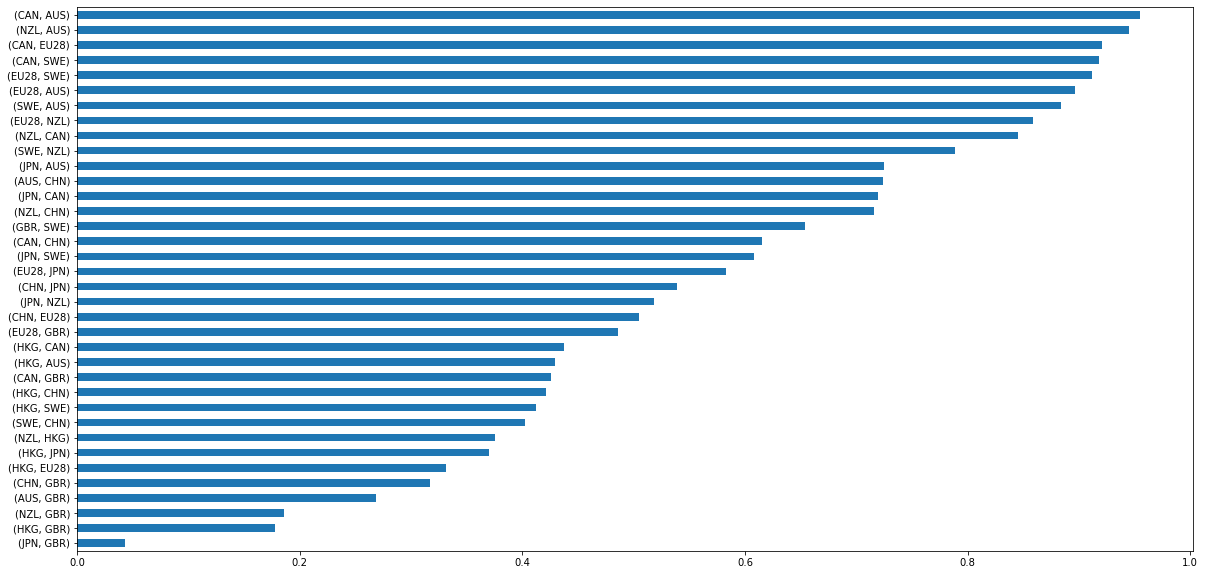

In [16]:
c = correlation_data.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
correlation_graph = so.iloc[0:72].iloc[::2]
correlation_graph.plot(kind = 'barh',figsize = (20,10))

In [17]:
correlation_data.style.background_gradient(cmap="Blues")

,AUS,GBR,NZL,EU28,HKG,CHN,SWE,CAN,JPN
AUS,1.000000,0.268754,0.945455,0.896232,0.429714,0.724122,0.883625,0.954716,0.724946
GBR,0.268754,1.000000,0.186127,0.486103,0.177747,-0.316715,0.654097,0.425505,0.043405
NZL,0.945455,0.186127,1.000000,0.858446,0.375207,0.715632,0.788892,0.844860,0.518339
EU28,0.896232,0.486103,0.858446,1.000000,0.331123,0.504823,0.912195,0.920655,0.583139
HKG,0.429714,0.177747,0.375207,0.331123,1.000000,0.420917,0.412234,0.437869,0.369825
CHN,0.724122,-0.316715,0.715632,0.504823,0.420917,1.000000,0.402217,0.615468,0.538972
SWE,0.883625,0.654097,0.788892,0.912195,0.412234,0.402217,1.000000,0.917631,0.608586
CAN,0.954716,0.425505,0.844860,0.920655,0.437869,0.615468,0.917631,1.000000,0.719226
JPN,0.724946,0.043405,0.518339,0.583139,0.369825,0.538972,0.608586,0.719226,1.000000


In [18]:
correlation_graph

JPN   GBR     0.043405
HKG   GBR     0.177747
NZL   GBR     0.186127
AUS   GBR     0.268754
CHN   GBR     0.316715
HKG   EU28    0.331123
      JPN     0.369825
NZL   HKG     0.375207
SWE   CHN     0.402217
HKG   SWE     0.412234
      CHN     0.420917
CAN   GBR     0.425505
HKG   AUS     0.429714
      CAN     0.437869
EU28  GBR     0.486103
CHN   EU28    0.504823
JPN   NZL     0.518339
CHN   JPN     0.538972
EU28  JPN     0.583139
JPN   SWE     0.608586
CAN   CHN     0.615468
GBR   SWE     0.654097
NZL   CHN     0.715632
JPN   CAN     0.719226
AUS   CHN     0.724122
JPN   AUS     0.724946
SWE   NZL     0.788892
NZL   CAN     0.844860
EU28  NZL     0.858446
SWE   AUS     0.883625
EU28  AUS     0.896232
      SWE     0.912195
CAN   SWE     0.917631
      EU28    0.920655
NZL   AUS     0.945455
CAN   AUS     0.954716
dtype: float64